# BEE 4750 Homework 2: Dissolved Oxygen

**Name**:

**ID**:

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [18]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE4750/HW2/hw02-anp49`


In [17]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.35 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.


![Figure 1: Schematic of the
system](figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 L</sup>/d | 10,000 L</sup>/d | 15,000 L</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [15]:
##Constants
Inflow_Cs = 10  ##mg/L Saturated Level
ka = .55
kc = .35
kn = .25
U = 6 #km/day
Cs = 10

#River Inflow
Inflow_Q = 100000 #L/day
Inflow_C0 = 7.5 ##mg/L Initial Level
Inflow_B0 = 5 #mg/Level
Inflow_N0 = 5 #mg/Level
inflow = [Inflow_Q Inflow_C0 Inflow_B0 Inflow_N0]



#Waste Stream 1
WS1_Q = 10000 #L/day
WS1_C0 = 5
WS1_B0 = 50
WS1_N0 = 35
ws1 = [WS1_Q WS1_C0 WS1_B0 WS1_N0]

#Waste Stream 2
WS2_Q = 15000 #L/day
WS2_C0 = 5
WS2_B0 = 45
WS2_N0 = 35
ws2 = [WS2_Q WS2_C0 WS2_B0 WS2_N0]




#Box 1 Initial State
C0 = ((inflow[1]*inflow[2])+ws1[1]*ws1[2])/(inflow[1]+ws1[1])
println("initial C0 is ",C0, " mg/L")
B0 = (inflow[1]*inflow[3]+ws1[1]*ws1[3])/(inflow[1]+ws1[1])
println("Initial B0 is ",B0, " mg/L")
N0 = (inflow[1]*inflow[4]+ws1[1]*ws1[4])/(inflow[1]+ws1[1])
println("Initial N0 is ", N0, " mg/L")

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
   α1 = exp(-ka * x / U)
   α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
   α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
   C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
   return C
end

#distance of Box 1:
dist = 15
x1 = 0:0.1:15
C1 = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x1)

#Box 2 Initial State 
BoxQ = ws1[1]+inflow[1] #combined Flow
BoxB0 = (Inflow_B0+ws1[3])exp((-kc*15)/U) 
println("Box 1 BO mix is ", BoxB0)
BoxN0 = (Inflow_N0+ws1[4])exp((-kn*15)/U)
println("Box 1 NO mix is ", BoxN0)
BoxC0 = C1[length(x1)] 
println("Box 1 CO mix is ", BoxC0)

#Box 2 Mixing 
C02 = (BoxC0*BoxQ+WS2_Q*WS2_C0)/(BoxQ+WS2_Q)
println("C0 entering Box 2 is ",C02, " mg/L")
B02 = (BoxB0*BoxQ+WS2_B0*WS2_Q)/(BoxQ+WS2_Q)
println("B0 Entering Box 2 is ",B02, " mg/L")
N02 = (BoxN0*BoxQ+WS2_Q*WS2_N0)/(BoxQ+WS2_Q)
println("N0 entering box is ", N02, " mg/L")

x2 = 15.1:.1:50 
C2 = (y1 -> dissolved_oxygen(y1, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)
print(C2) # this is negative for some reason

x = [x1; x2]
C = [C1; C2]
println(C1)
println(C2)


maxarray = findmax(C)
println(maxarray)
maxC = maxarray[1]
location = x[maxarray[2]]
println("The max DO concentration is ", maxC, "and is located ", location, " m downstream")





initial C0 is 7.2727272727272725 mg/L
Initial B0 is 9.090909090909092 mg/L
Initial N0 is 7.7272727272727275 mg/L


Box 1 BO mix is 22.92741108231796
Box 1 NO mix is 21.41045714075961
Box 1 CO mix is 4.8823643755173025
C0 entering Box 2 is 4.896480650455226 mg/L
B0 Entering Box 2 is 25.576121752439803 mg/L
N0 entering box is 23.041202283868458 mg/L


[-4.039035278360894, -4.023135911257577, -4.006813306824117, -3.9900742820086528, -3.972925575826304, -3.955373850155752, -3.937425690528034, -3.9190876069076683, -3.9003660344662663, -3.8812673343484834, -3.861797794430667, -3.8419636300719935, -3.8217709848583983, -3.801225931339201, -3.780334471756592, -3.7591025387679604, -3.7375359961612826, -3.7156406395634383, -3.6934221971416674, -3.6708863302982264, -3.6480386343581648, -3.624884639250528, -3.6014298101827666, -3.5776795483087094, -3.553639191389899, -3.529314014450522, -3.504709230425944, -3.479829990804884, -3.454681386265338, -3.429268447304252, -3.4035961448610808, -3.377669390935213, -3.3514930391973508, -3.3250718855949426, -3.29841066895166, -3.2715140715609845, -3.244386719774033, -3.2170331845815836, -3.1894579821904037, -3.161665574593937, -3.1336603701373624, -3.105446724077165, -3.077028939135169, -3.048411266047128, -3.0195979041059857, -2.99059300169972, -2.9614006568439786, -2.9320249177094118, -2.90246978314388

 -3.6480386343581648, -3.624884639250528, -3.6014298101827666, -3.5776795483087094, -3.553639191389899, -3.529314014450522, -3.504709230425944, -3.479829990804884, -3.454681386265338, -3.429268447304252, -3.4035961448610808, -3.377669390935213, -3.3514930391973508, -3.3250718855949426, -3.29841066895166, -3.2715140715609845, -3.244386719774033, -3.2170331845815836, -3.1894579821904037, -3.161665574593937, -3.1336603701373624, -3.105446724077165, -3.077028939135169, -3.048411266047128, -3.0195979041059857, -2.99059300169972, -2.9614006568439786, -2.9320249177094118, -2.902469783143885, -2.872739203189491, -2.8428370795945472, -2.812767266320476, -2.782533570043767, -2.752139750652942, -2.721589521740656, -2.690886551090963, -2.660034461161712, -2.629036829562275, -2.597897189526491, -2.566619030380987, -2.5352057980088656, -2.503660895308803, -2.471987682649633, -2.440189478320418, -2.408269558976105, -2.3762311600787216, -2.34407747633427, -2.3118116621252804, -2.2794368319390417, -2.2

In [16]:
(plot(x,C))
xlabel!("Distance [km]")
ylabel!("DO Concentration [mg/L]")
title!("DO Conc over distance from Waste Point 1")
display(plot(x,C))


UndefVarError: UndefVarError: `plot` not defined

In [19]:
##Constants
Inflow_Cs = 10  ##mg/L Saturated Level
ka = .55
kc = .35
kn = .25
U = 6 #km/day
Cs = 10

#River Inflow
Inflow_Q = 100000 #L/day
Inflow_C0 = 7.5 ##mg/L Initial Level
Inflow_B0 = 5 #mg/Level
Inflow_N0 = 5 #mg/Level
inflow = [Inflow_Q Inflow_C0 Inflow_B0 Inflow_N0]



#Waste Stream 1
WS1_Q = 10000 #L/day
WS1_C0 = 5
WS1_B0 = 50
WS1_N0 = 35
ws1 = [WS1_Q WS1_C0 WS1_B0 WS1_N0]

#Waste Stream 2
WS2_Q = 15000 #L/day
WS2_C0 = 5
WS2_B0 = 45
WS2_N0 = 35
ws2 = [WS2_Q WS2_C0 WS2_B0 WS2_N0]




#Box 1 Initial State
C0 = ((inflow[1]*inflow[2])+ws1[1]*ws1[2])/(inflow[1]+ws1[1])
println("initial C0 is ",C0, " mg/L")
B0 = (inflow[1]*inflow[3]+ws1[1]*ws1[3])/(inflow[1]+ws1[1])
println("Initial B0 is ",B0, " mg/L")
N0 = (inflow[1]*inflow[4]+ws1[1]*ws1[4])/(inflow[1]+ws1[1])
println("Initial N0 is ", N0, " mg/L")

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
   α1 = exp(-ka * x / U)
   α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
   α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
   C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
   return C
end

#distance of Box 1:
dist = 15
x1 = 0:0.1:15
C1 = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x1)

#Box 2 Initial State 
BoxQ = ws1[1]+inflow[1] #combined Flow
BoxB0 = (Inflow_B0+ws1[3])exp((-kc*15)/U) 
println("Box 1 BO mix is ", BoxB0)
BoxN0 = (Inflow_N0+ws1[4])exp((-kn*15)/U)
println("Box 1 NO mix is ", BoxN0)
BoxC0 = C1[length(x1)] 
println("Box 1 CO mix is ", BoxC0)

#Box 2 Mixing 
C02 = (BoxC0*BoxQ+WS2_Q*WS2_C0)/(BoxQ+WS2_Q)
println("C0 entering Box 2 is ",C02, " mg/L")
B02 = (BoxB0*BoxQ+WS2_B0*WS2_Q)/(BoxQ+WS2_Q)
println("B0 Entering Box 2 is ",B02, " mg/L")
N02 = (BoxN0*BoxQ+WS2_Q*WS2_N0)/(BoxQ+WS2_Q)
println("N0 entering box is ", N02, " mg/L")

x2 = 0:.1:50 
C2 = (y1 -> dissolved_oxygen(y1, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)


x2 = x2 .+ 15

x = [x1; x2]
C = [C1; C2]



maxarray = findmax(C)
println(maxarray)
maxC = maxarray[1]
location = x[maxarray[2]]
println("The max DO concentration is ", maxC, "and is located ", location, " m downstream")

initial C0 is 7.2727272727272725 mg/L
Initial B0 is 9.090909090909092 mg/L
Initial N0 is 7.7272727272727275 mg/L


Box 1 BO mix is 22.92741108231796
Box 1 NO mix is 21.41045714075961
Box 1 CO mix is 4.8823643755173025
C0 entering Box 2 is 4.896480650455226 mg/L
B0 Entering Box 2 is 25.576121752439803 mg/L
N0 entering box is 23.041202283868458 mg/L
(

7.2727272727272725, 1)
The max DO concentration is 7.2727272727272725and is located 0.0 m downstream


### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

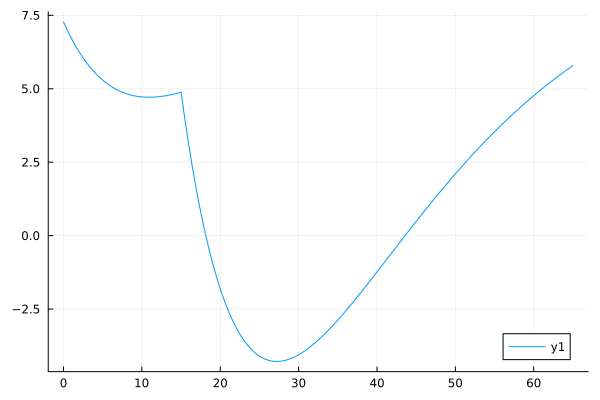

In [20]:
(plot(x,C))
xlabel!("Distance [km]")
ylabel!("DO Concentration [mg/L]")
title!("DO Conc over distance from Waste Point 1")
display(plot(x,C))



### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [23]:

rcvry = 6

x = 15:.1:50
C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)


function Rec_Dist(C,x)

for i in 1:length(C)
    DO = C[i]
    if DO >= rcvry
        recoverydst = x[i]
        return recoverydst
        break
    end
end

end

rd = Rec_Dist(C,x)


println("Recovery to 6mg/L DO Content occurs ", rd, "km downstream of Waste Point 2")




Recovery to 6mg/L DO Content occurs 25.0km downstream of Waste Point 2


### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?


|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 L</sup>/d | 10,000 L</sup>/d | 15,000 L</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

In [ ]:
#Waste Stream

#Waste Stream 1
WS1_Q = 10000 #L/day
WS1_C0 = 5
WS1_B0 = 50
WS1_N0 = 35
ws1 = [WS1_Q WS1_C0 WS1_B0 WS1_N0]


### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.

For mixing box1 equations in problem 1: example code from powerpoints was used